RinJeong_Team - 202055148 정혜린, 202055158 황연정

# 💪🏻악력 예측 모델💪🏻

### Q. 악력이 센 사람의 특징은 무엇일까?!🤷‍♂️

*악력 측정 : 손으로 무엇을 쥐는 힘의 최대 근력을 측정하는 체력 측정 방법

---

### 1. 데이터 셋 읽어오기

In [1]:
# 데이터 분석에 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from pandas import Series, DataFrame

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision %.3f

%matplotlib inline

plt.rc('font', family='Malgun Gothic')

In [2]:
#분석에 필요한 데이터셋 불러오기
d19= pd.read_csv('19yr_all.csv')

#데이터 편집
d19['grp_r'] = (d19['GS_mea_r_1']+d19['GS_mea_r_2']+d19['GS_mea_r_3'])/3
d19['grp_l'] = (d19['GS_mea_l_1']+d19['GS_mea_l_2']+d19['GS_mea_l_3'])/3
d19['grp'] = (d19['grp_r']+d19['grp_l'])/2

df = d19[['sex', 'age', 'HE_wt','HE_ht', 'BE5_1','grp_r','grp_l','grp']]
df.loc[df.sex==1, 'sex']= 'M'
df.loc[df.sex==2, 'sex']= 'F'

#sex: 성별 / age : 나이 / HE_ht : 키 / HE_wt : 몸무게 
#BE5_1 : 1주일간 근력운동 일수
#GS_mea_r_1 : 1차 악력측정(오른손)
#GS_mea_r_2 : 2차 악력측정(오른손)
#GS_mea_r_3 : 3차 악력측정(오른손)
#GS_mea_l_1 : 1차 악력측정(왼손)
#GS_mea_l_2 : 2차 악력측정(왼손)
#GS_mea_l_3 : 3차 악력측정(왼손)

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (107,380,399,505,514,517,530,541) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
df.dropna(inplace = True)
d = df.reset_index()
d

<ipython-input-3-9d7e45d52638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,index,sex,age,HE_wt,HE_ht,BE5_1,grp_r,grp_l,grp
0,0,M,61,81.6,177.2,1.0,32.866667,31.733333,32.300000
1,1,M,28,51.7,174.9,4.0,37.833333,36.866667,37.350000
2,2,M,53,63.1,178.6,2.0,40.866667,40.333333,40.600000
3,3,F,50,63.9,154.9,1.0,28.200000,24.933333,26.566667
4,5,F,71,63.6,147.3,3.0,18.466667,13.633333,16.050000
...,...,...,...,...,...,...,...,...,...
6589,8104,M,62,56.3,173.6,6.0,47.266667,43.833333,45.550000
6590,8105,F,48,49.4,155.1,1.0,13.333333,14.833333,14.083333
6591,8106,M,47,62.1,166.5,3.0,40.033333,34.533333,37.283333
6592,8107,F,43,40.6,162.5,1.0,6.400000,5.766667,6.083333


---

### 2. 각 변수의 영향 분석

성별

Text(0.5, 1.0, '성별간 악력 분포')

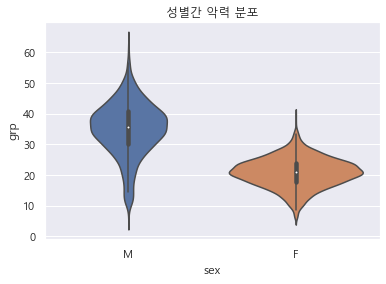

In [4]:
#성별간 악력 분포 차이
sns.violinplot(x="sex", y="grp", data=d)
plt.title('성별간 악력 분포')

In [5]:
#성별값을 이용한 예측 모델
m1 = smf.ols( "grp ~ sex",  data=d).fit()

나이

Text(0.5, 1.0, '나이대 별 악력 분포')

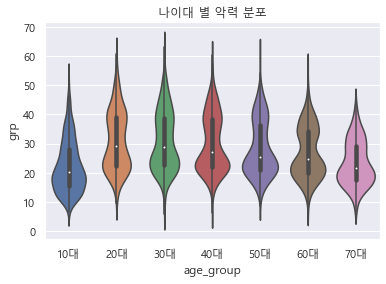

In [6]:
#나이대 별 악력 분포 차이
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
group_names = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
age_cut_data = pd.cut(d.age, age_bins, right = False, labels = group_names)
d['age_group'] = age_cut_data

sns.violinplot(x="age_group", y="grp", data=d, 
              order=['10대', '20대', '30대', '40대', '50대', '60대', '70대'])
plt.title('나이대 별 악력 분포')

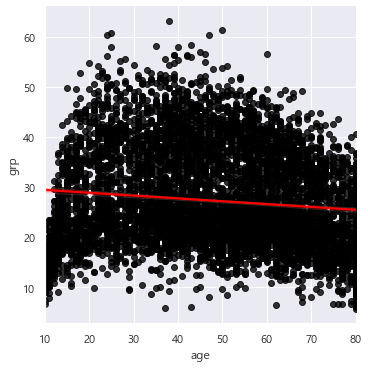

In [7]:
#'나이'에 따른 악력의 회귀직선 그래프
sns.lmplot(x = "age", y = "grp", data = d,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "red"})

In [8]:
#나이값을 이용한 예측 모델
m2 = smf.ols( "grp ~ age",  data=d).fit()

키

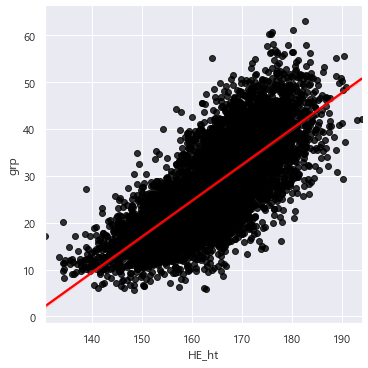

In [9]:
#'키'에 따른 악력의 회귀직선 그래프
sns.lmplot(x = "HE_ht", y = "grp", data = d,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "red"})

In [10]:
#키값을 이용한 예측 모델
m3 = smf.ols( "grp ~ HE_ht",  data=d).fit()

몸무게

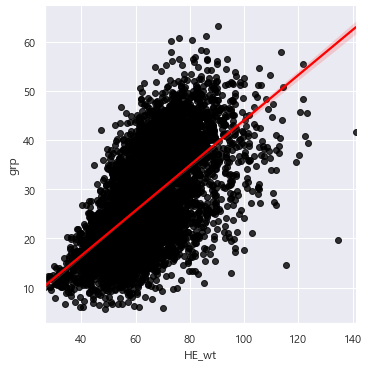

In [11]:
#'몸무게'에 따른 악력의 회귀직선 그래프
sns.lmplot(x = "HE_wt", y = "grp", data = d,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "red"})

In [12]:
#몸무게값을 이용한 예측 모델
m4 = smf.ols( "grp ~ HE_wt",  data=d).fit()

1주일간 근력운동 일수

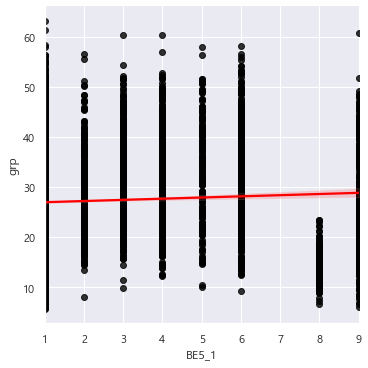

In [13]:
#'1주일간 근력운동 일수'에 따른 악력의 회귀직선 그래프
sns.lmplot(x = "BE5_1", y = "grp", data = d,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "red"})

In [14]:
#1주일간 근력운동 일수값을 이용한 예측 모델
m5 = smf.ols( "grp ~ BE5_1",  data=d).fit()

#### [성능이 좋은 순으로 모델 나열]

In [15]:
# 로그우도로 분석 : 절댓값이 작을수록 좋음
print(m1.llf, m2.llf, m3.llf, m4.llf, m5.llf)

-22066.941090817967 -24384.173713724904 -21640.041299177177 -22788.3088779159 -24417.111773913894


키 -> 성별 -> 나이 -> 몸무게 -> 1주일간 근력운동 일수

In [16]:
# AIC로 분석 : 작을수록 좋음
print(m1.aic, m2.aic, m3.aic, m4.aic, m5.aic)

44137.882181635934 48772.34742744981 43284.082598354355 45580.6177558318 48838.22354782779


키 -> 성별 -> 몸무게 -> 나이 -> 1주일간 근력운동 일수

In [17]:
# 결정계수로 분석 : 1에 가까울수록 좋음
print(m1.rsquared, m2.rsquared, m3.rsquared, m4.rsquared, m5.rsquared)

0.5111801419695113 0.012847363906534515 0.570546809422428 0.3916263573955395 0.0029359741181064214


키 -> 성별 -> 나이 -> 몸무게 -> 1주일간 근력운동 일수

---

### 3. 다중 회귀 모델 생성

In [18]:
#양손 평균 악력 모델
lm = smf.ols(formula = "grp ~ sex+age+HE_wt+HE_ht+BE5_1", data = d).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    grp   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2872.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:48:30   Log-Likelihood:                -20613.
No. Observations:                6594   AIC:                         4.124e+04
Df Residuals:                    6588   BIC:                         4.128e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.1010      1.702    -29.440      0.000     -53.437     -46.765
sex[T.M]       7.4791      0.184     40.558      0.000       7.118       7.841
age            0.0063      0.004      1.704      0.088      -0.001       0.013
HE_wt          0.1419      0.007     20.600      0.000       0.128       0.155
HE_ht          0.3959      0.011     34.638      0.000       0.374       0.418
BE5_1          0.0015      0.031      0.050      0.960      -0.059       0.062
==============================================================================
Omnibus:                      147.457   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.557
Skew:                          -0.215   Prob(JB):                     4.29e-52
Kurtosis:                       3.822   Cond. No.                     4.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

각 독립변수들을 개별적으로 분석하여 성능이 좋은 순으로 나열했을 때는 '나이'가 유의미 할것이라 생각되었는데, 다중회귀모델 구축 후 t검정을 기준으로 따져보니 p값이 0.05 보다 크게 나와 무의미한 값이라 판단되어 예측 모델에 사용될 독립변수에서 제외시켰다.

In [19]:
#오른손 악력 모델
lmr = smf.ols(formula = "grp_r ~ sex+HE_wt+HE_ht", data = d).fit()
#왼손 악력 모델
lml = smf.ols(formula = "grp_l ~ age+HE_wt+HE_ht", data = d).fit()

---

### 4. 다중회귀모델을 이용한 악력 예측

In [20]:
pr = pd.DataFrame(lmr.predict())
d['grp_r_predicted']= pr
pl = pd.DataFrame(lml.predict())
d['grp_l_predicted']= pl
d

,index,sex,age,HE_wt,HE_ht,BE5_1,grp_r,grp_l,grp,age_group,grp_r_predicted,grp_l_predicted
0,0,M,61,81.6,177.2,1.0,32.866667,31.733333,32.300000,60대,40.077648,38.542805
1,1,M,28,51.7,174.9,4.0,37.833333,36.866667,37.350000,20대,34.673712,31.817527
2,2,M,53,63.1,178.6,2.0,40.866667,40.333333,40.600000,50대,37.846107,36.455822
3,3,F,50,63.9,154.9,1.0,28.200000,24.933333,26.566667,50대,21.153524,21.537908
4,5,F,71,63.6,147.3,3.0,18.466667,13.633333,16.050000,70대,18.114698,17.185376
...,...,...,...,...,...,...,...,...,...,...,...,...
6589,8104,M,62,56.3,173.6,6.0,47.266667,43.833333,45.550000,60대,34.853625,32.485932
6590,8105,F,48,49.4,155.1,1.0,13.333333,14.833333,14.083333,40대,19.051025,19.435607
6591,8106,M,47,62.1,166.5,3.0,40.033333,34.533333,37.283333,40대,32.929395,28.522802
6592,8107,F,43,40.6,162.5,1.0,6.400000,5.766667,6.083333,40대,20.642129,22.667815


---

### 5. 실제값과 예측된값 비교분석

- 오른손

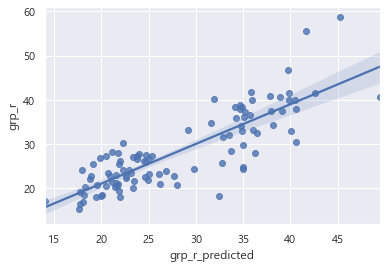

In [21]:
#처음 100개 샘플에 대한 예측값 vs 관측값 그래프
sns.regplot(x='grp_r_predicted', y='grp_r',data=d.head(100))

In [22]:
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grp_r   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4300.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:48:38   Log-Likelihood:                -21036.
No. Observations:                6594   AIC:                         4.208e+04
Df Residuals:                    6590   BIC:                         4.211e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -49.4754      1.623    -30.483      0.000     -52.657     -46.294
sex[T.M]       7.4773      0.189     39.644      0.000       7.108       7.847
HE_wt          0.1504      0.007     20.876      0.000       0.136       0.165
HE_ht          0.3939      0.011     34.425      0.000       0.371       0.416
==============================================================================
Omnibus:                      139.931   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.453
Skew:                          -0.195   Prob(JB):                     9.07e-51
Kurtosis:                       3.828   Cond. No.                     3.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Skewness값(-0.195)이 0보다 살짝 작으므로 왼쪽 꼬리가 살짝 더 길것이다. Kurtosis값(3.828)이 3 보다 살짝 크므로 정규분포보다 살짝 뾰족한 분포를 보일것이다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


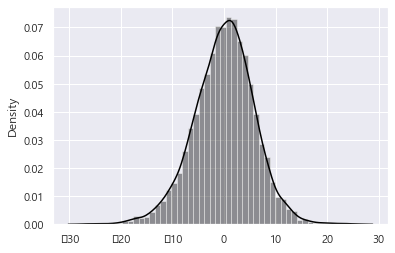

In [23]:
#잔차 그래프 - 잔차(residual)은 정규분포임을 가정
resid1 = lmr.resid
sns.distplot(resid1, color = 'black')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


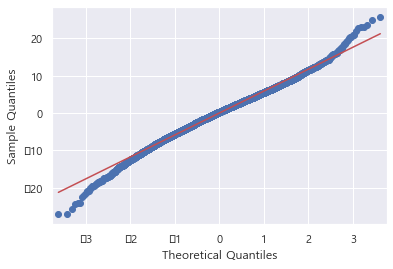

In [24]:
fig = sm.qqplot(resid1, line = "s")

- 왼손

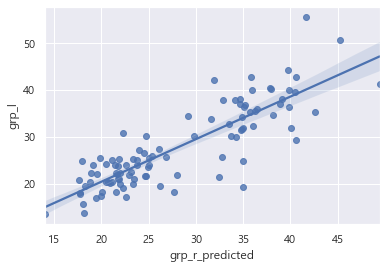

In [25]:
#처음 100개 샘플에 대한 예측값 vs 관측값 그래프
sns.regplot(x='grp_r_predicted', y='grp_l',data=d.head(100))

In [26]:
lml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grp_l   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     3174.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:48:45   Log-Likelihood:                -21452.
No. Observations:                6594   AIC:                         4.291e+04
Df Residuals:                    6590   BIC:                         4.294e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.0776      1.602    -54.361      0.000     -90.218     -83.937
age            0.0235      0.004      5.690      0.000       0.015       0.032
HE_wt          0.1505      0.008     19.290      0.000       0.135       0.166
HE_ht          0.6316      0.011     56.716      0.000       0.610       0.653
==============================================================================
Omnibus:                       36.208   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.514
Skew:                           0.086   Prob(JB):                     7.93e-11
Kurtosis:                       3.374   Cond. No.                     3.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Skewness값(0.086	)이 0보다 살짝 크므로 오른쪽 꼬리가 살짝 더 길것이다. Kurtosis값(3.374)이 3 보다 살짝 크므로 정규분포보다 살짝 뾰족한 분포를 보일것이다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


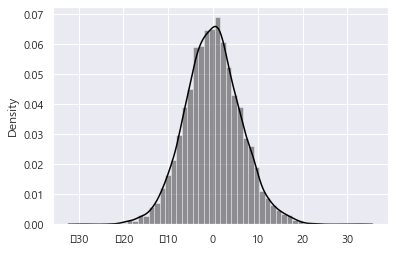

In [27]:
#잔차 그래프 
resid2 = lml.resid
sns.distplot(resid2, color = 'black')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


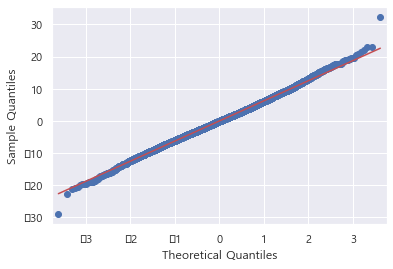

In [28]:
fig = sm.qqplot(resid2, line = "s")

---

### 6. 새로운 입력값으로 악력 예측해보기

In [51]:
#오른손 악력 예측
s = input("성별:")
h = float(input("키:"))
w = float(input("몸무게:"))

beta0 = lmr.params[0]
beta1 = lmr.params[1]
beta2 = lmr.params[3]
beta3 = lmr.params[2]

x = beta0 + beta1*(s=='M') + beta2*h + beta3*w

print("당신은 악력은 %f 일것으로 예측됩니다."%x)

성별:M
키:159
몸무게:47
당신은 악력은 27.703550 일것으로 예측됩니다.


In [53]:
#왼손 악력 예측
s = input("성별:")
h = float(input("키:"))
w = float(input("몸무게:"))

beta0 = lml.params[0]
beta1 = lml.params[1]
beta2 = lml.params[3]
beta3 = lml.params[2]

x = beta0 + beta1*(s=='M') + beta2*h + beta3*w

print("당신은 악력은 %f 일것으로 예측됩니다."%x)

성별:M
키:159
몸무게:47
당신은 악력은 20.435422 일것으로 예측됩니다.


---

# 결론
### Q. 악력이 센 사람의 특징은 무엇일까?!

### A. 키 크고 몸무게 많이 나가고 남자일 경우 악력이 셀 확률이 높다.
###     예상과 달리 나이와 1주일간 근력운동 일수는 큰 영향을 미치지 않는 것으로 확인되었다.


---